In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv("resources/KNN_Project_Data")

In [5]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### Standardize the data 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [8]:
scalar.fit(data.drop("TARGET CLASS", axis= 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
feature_list = scalar.transform(data.drop("TARGET CLASS", axis= 1))

In [10]:
feature_DF = pd.DataFrame(feature_list, columns=data.columns[:-1])

### Train Split

In [11]:
X = feature_DF
y = data["TARGET CLASS"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN Algo

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
predicitons = knn.predict(X_test)

## Metrics

In [16]:
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

   micro avg       0.72      0.72      0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



In [17]:
print(confusion_matrix(y_test,predicitons))

[[119  44]
 [ 50 117]]


## Low numbers above lets use the elbow method to improve 

In [18]:
error_rate = []
for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    predic = kn.predict(X_test)
    error_rate.append(np.mean(y_test != predic))

### Lets plot the K value to the Error rate Using the Elbow Method. Looks as though a K Value of 33 would be a better fit for our model as well as our metrics

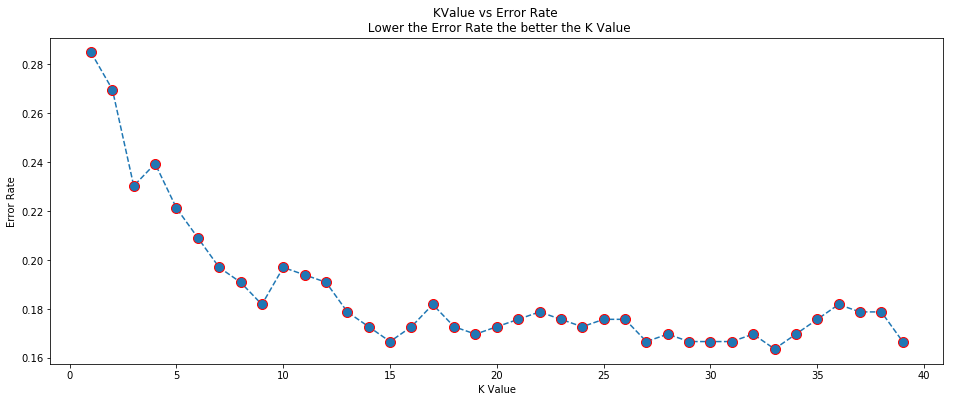

In [19]:
plt.figure(figsize=(16,6))
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.title("KValue vs Error Rate \n Lower the Error Rate the better the K Value")
plt.plot(range(1,40), error_rate, ls = "--", marker = "o", mec = "r", ms = 10)

## This provides up a 12% increase in accuracy

In [20]:
k = KNeighborsClassifier(n_neighbors=33)
k.fit(X_train, y_train)
predd = k.predict(X_test)
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

[[140  23]
 [ 31 136]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       163
           1       0.86      0.81      0.83       167

   micro avg       0.84      0.84      0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

